In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import pandas as pd
from src.agent.train import save_dir
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set(style='whitegrid')

In [72]:
int_behavior_dirs = {
    'None': 'int_behaviorno_act_encounter_s0',
    'Random': 'int_behaviorrandom_act_encounter_s0',
    'Single': 'int_behaviorsingle_act_encounter_s0',
    'Sticky': 'int_behaviorsticky_act_encounter_s0'
}
pnmac_dirs = {
    .05: 'pnmac_exp_0.05_s0',
    .1: 'pnmac_exp_0.1_s0',
    .15: 'pnmac_exp_0.15_s0',
    .25: 'pnmac_exp_0.25_s0',
    .5: 'pnmac_exp_0.5_s0'
}
rw_shape_dirs = {
    1e-2: 'rw_shaping_exp0.01_s0',
    3e-3: 'rw_shaping_exp0.003_s0',
    1e-3: 'rw_shaping_exp0.001_s0',
    3e-4: 'rw_shaping_exp0.0003_s0',
    1e-4: 'rw_shaping_exp0.0001_s0'
}

In [73]:
default_metrics.sum() / default_metrics.count()

NameError: name 'default_metrics' is not defined

In [74]:
# metrics = pd.read_csv(save_dir 
#             / int_behavior_dirs['Single'] 
#             / 'validation' 
#             / 'metrics_n5000_s44.csv')
metrics = pd.read_csv(save_dir 
            / pnmac_dirs[.05] 
            / 'validation' 
            / 'metrics_n5000_s44.csv')
# metrics = pd.read_csv(save_dir 
#             / rw_shape_dirs[1e-3] 
#             / 'validation' 
#             / 'metrics_n5000_s44.csv')

metrics.head()

,nmac,alert,reversal,segments
0,False,False,False,0
1,True,False,False,0
2,False,False,False,0
3,False,False,False,0
4,True,True,True,1


In [75]:
metrics.sum() / metrics.count()

nmac        0.3412
alert       0.2390
reversal    0.0096
segments    0.2604
dtype: float64

## Results

We want to compare performance between intruder behaviors, pnmacs, and reward shapings.

Compare by: 
1. NMAC rate
2. Alert rate
3. Reversal rate

In [76]:
base_metrics = pd.read_csv(save_dir / 'metrics_n5000_s44.csv')
base_metrics.head()

,nmac,alert,reversal,segments
0,False,False,False,0
1,True,False,False,0
2,False,False,False,0
3,False,False,False,0
4,True,False,False,0


In [77]:
int_behavior_dirs['No Maneuvers']

KeyError: 'No Maneuvers'

In [78]:
pd.read_csv(save_dir 
            / int_behavior_dirs['No Maneuvers']
            / 'validation' 
            / 'metrics_n5000_s44.csv')

KeyError: 'No Maneuvers'

In [79]:
def summarize_results(exp_dirs):
    summary_dict = {}
    control = pd.read_csv(save_dir
                / 'metrics_n5000_s44.csv')
    control = control.sum() / control.count()
    summary_dict['Control'] = control
    
    for name, dirname in exp_dirs.items():
        summ = pd.read_csv(save_dir 
                / dirname
                / 'validation' 
                / 'metrics_n5000_s44.csv')
        summ = summ.sum() / summ.count()
        summary_dict[name] = summ
    
    return summary_dict

In [80]:
# res = summarize_results(int_behavior_dirs)
res = summarize_results(pnmac_dirs)
# res = summarize_results(rw_shape_dirs)

<IPython.core.display.Javascript object>


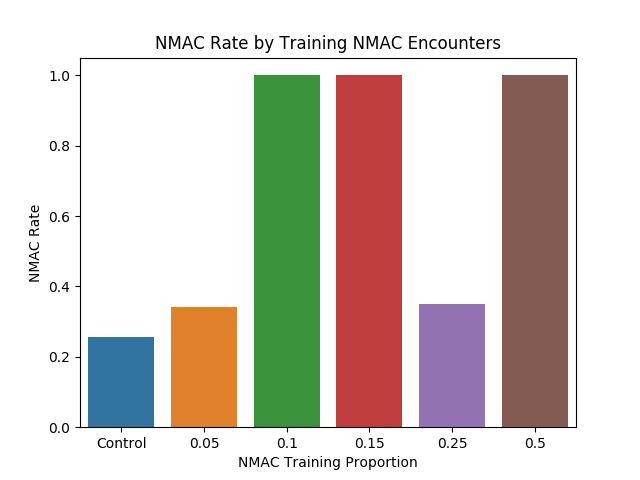

In [81]:
xs = list(res.keys())
ys = [res[x].nmac for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('NMAC Rate')
plt.title('Collision Rate by Training Behavior')
plt.show()

In [82]:
xs = list(res.keys())
ys = [res[x].alert for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('Alert Rate')
plt.title('Alert Rate by Training Behavior')
plt.show()

In [83]:
res = summarize_results(pnmac_dirs)

In [84]:
xs = list(res.keys())
ys = [res[x].nmac for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('NMAC Training Proportion')
plt.ylabel('NMAC Rate')
plt.title('NMAC Rate by Training NMAC Encounters')
plt.show()

In [46]:
from src.agent.validation import create_encounter_set, collect_encounter_data

In [48]:
encounters = create_encounter_set(10, p_nmac=1, seed=2)
# all_encs = collect_encounter_data(encounters, 'int_behaviorsingle_act_encounter_s0')
all_encs = collect_encounter_data(encounters, 'pnmac_exp_0.15_s0')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ajoerger/6.867/deep-rl-collision-avoidance/src/src/models/pnmac_exp_0.15_s0/pnmac_exp_0.15_s0_hyperparams.pkl'

In [ ]:
from src.plot import encounter_plot

In [ ]:
enc = all_encs[1]
encounter_plot(enc)